In [2]:
!pip install pandas --upgrade
!pip install matplotlib 
!pip install seaborn 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Exploratory Data Analysis using Python on Video Games Sales Data Analysis

In this project we will analyze the data for different video games in different regions.
This is the link to Download the dataset [Kaggle DataSet](https://www.kaggle.com/datasets/gregorut/videogamesales)

## Downloading the Dataset

Downloaded the dataset from Kaggle. 

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/gregorut/videogamesales'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: siddhshah02
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 83.5MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './videogamesales'

In [6]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "video-game-sales-eda" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(files = ['./videogamesales'],project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhshah61/video-game-sales-eda" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/siddhshah61/video-game-sales-eda


'https://jovian.ai/siddhshah61/video-game-sales-eda'

## Data Preparation and Cleaning

Loading the DataSet using Pandas read.csv.



In [11]:
data_dir = './videogamesales/vgsales.csv'

In [14]:
dataset = pd.read_csv(data_dir)

In [15]:
dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
missing_values = dataset.isna().sum().sort_values(ascending=False);
missing_values

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

dataset.info() method gives the gist of the total number of entries and columns and their data type.

So here we can see that there are 16598 entries and 11 cloumns, let's Get started.

dataset.isna().sum() gives the total number of null or empty values per column.

There are some entries wehre the value of 'Publisher', 'Year' is null or empty.

<AxesSubplot:>

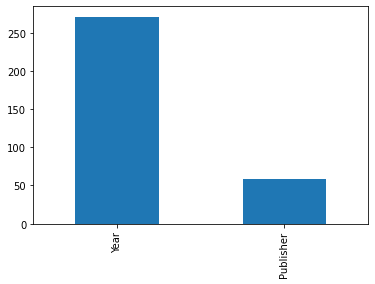

In [20]:
missing_values[missing_values>0].plot(kind='bar');

The above graph shows the number of missing values of columns in the dataset.

In [21]:
dataset.dropna(subset=['Year','Publisher'],inplace = True)

In [22]:
dataset.isna().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

So we have removed the entries which had null or missing values for year and publisher columns.

we could have given the value as "Not Given" but the number of missing entry values where less as compared to the whole data set.

In [84]:
a = len(dataset['Platform'].unique())
a

31

So there are 31 different types of platform for games.

In [23]:
import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhshah61/video-game-sales-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddhshah61/video-game-sales-eda


'https://jovian.ai/siddhshah61/video-game-sales-eda'

## Exploratory Analysis and Visualization

We will analyse the data using matplotlib, numpy etc

By analysing and visualising the data we will get to know more about the data.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import matplotlib

In [31]:
dataset.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Let's find out the total number of sales for all the games combined(in millions).

In [32]:
total_sales = dataset.NA_Sales.sum() + dataset.EU_Sales.sum() + dataset.JP_Sales.sum() + dataset.Other_Sales.sum() + dataset.Global_Sales.sum()

In [33]:
total_sales

17619.489999999998

The total sales of all the games included was 17619 million.

Here we will see the comparison between rank and year for the games indexed from 70 to 89.

In [36]:
df = dataset[70:90]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
70,71,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
71,72,Donkey Kong Country,SNES,1994.0,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30
72,73,Minecraft,X360,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
73,74,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09
74,75,Mario Party DS,DS,2007.0,Misc,Nintendo,4.46,1.88,1.98,0.70,9.02
75,76,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
76,77,Super Mario Kart,SNES,1992.0,Racing,Nintendo,3.54,1.24,3.81,0.18,8.76
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
78,79,Wii Party,Wii,2010.0,Misc,Nintendo,1.79,3.53,2.49,0.68,8.49
79,80,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49


Text(0, 0.5, 'Year')

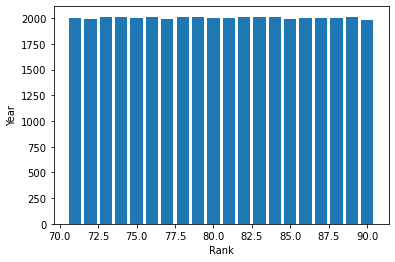

In [38]:
plt.bar(df.Rank,df.Year)
plt.xlabel('Rank')
plt.ylabel('Year')

So the Highest ranked game among the top 10 was launched in around 2006 and 

Scatter plot to compare ranks and sales.


In [ ]:
sns.scatterplot(x=dataset.rank, y=dataset., hue=flowers_df.species, s=100);

describe() functions gives us various numerical information like count, mean, min, max , etc.

In [28]:
dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Let us save and upload our work to Jovian before continuing

In [64]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/siddhshah61/video-game-sales-eda


'https://jovian.ai/siddhshah61/video-game-sales-eda'

## Asking and Answering Questions

We will ask some questions and we'll get to know more about the dataset.



#### Q1: Total Games Launched Every Year

In [41]:
total_df = dataset.groupby('Year')[['Name']].count()
total_df

,Name
Year,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


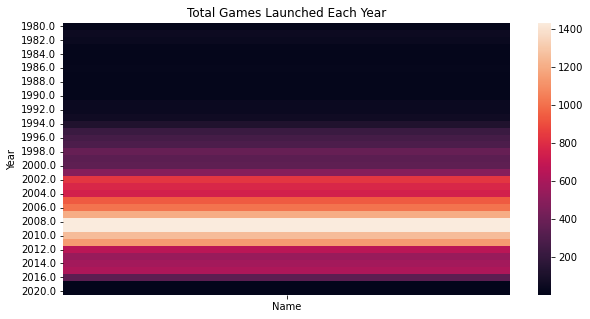

In [42]:
plt.figure(figsize=(10,5))
plt.title("Total Games Launched Each Year")
sns.heatmap(total_df);

By looking at the heatmap above we can say that the in the year 2008 most of the games were launched.

#### Q2: Comparison between sales in each region.

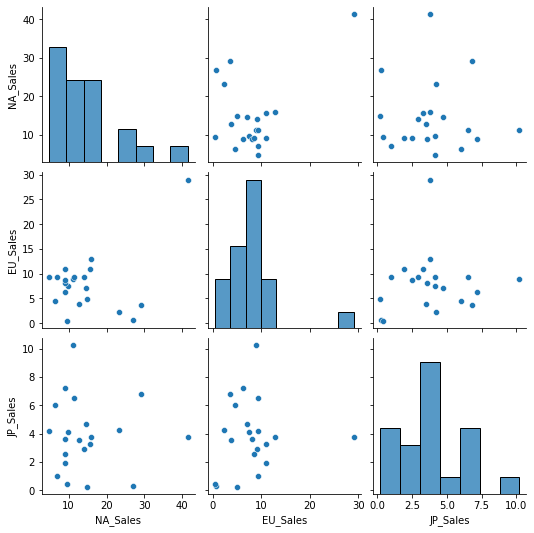

In [121]:
sns.pairplot(dataset.loc[0:20,['NA_Sales','EU_Sales','JP_Sales']])
plt.show()

THe conclusion from the above graphs will be that the NA region likes to play games a lot so does the EU region.

#### Q3: Which were the top 15 games sold globally?

In [50]:
top_15 = dataset.head(15)
top_15

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


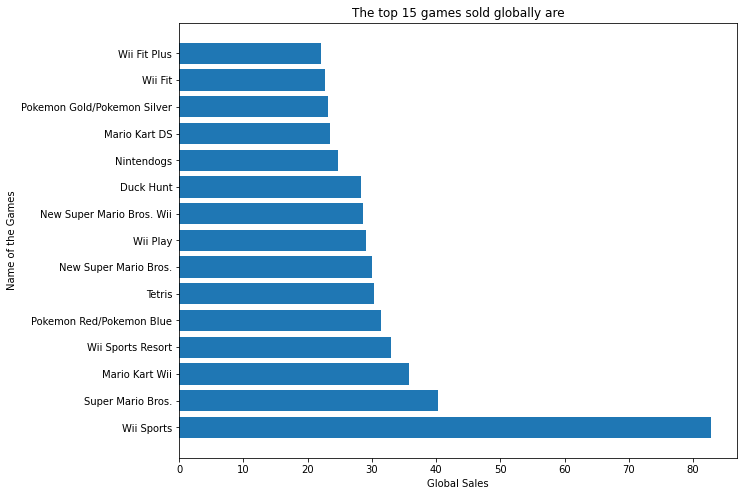

In [61]:
plt.figure(figsize=(10, 8))
plt.barh(top_15.Name,top_15.Global_Sales)
plt.title("The top 15 games sold globally are")
plt.xlabel("Global Sales")
plt.ylabel("Name of the Games");

WII Sports was the game which was the best selling in global sales

#### Q4: PIE chart for top 10 best selling NA Games.

In [64]:
col_list= ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']
dataset['TotalSale'] = dataset[col_list].sum(axis=1)
dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,TotalSale
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.02
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.02
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.02


In [112]:
NA_top_10 = pd.DataFrame(dataset.groupby('Name')['NA_Sales'].sum())
NA_top_10.sort_values('NA_Sales',ascending=False,inplace=True)
NA_top_10 = NA_top_10.head(10)
NA_top_10

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
Call of Duty: Black Ops,17.01
Super Mario World,15.99
Mario Kart Wii,15.85
Wii Sports Resort,15.75


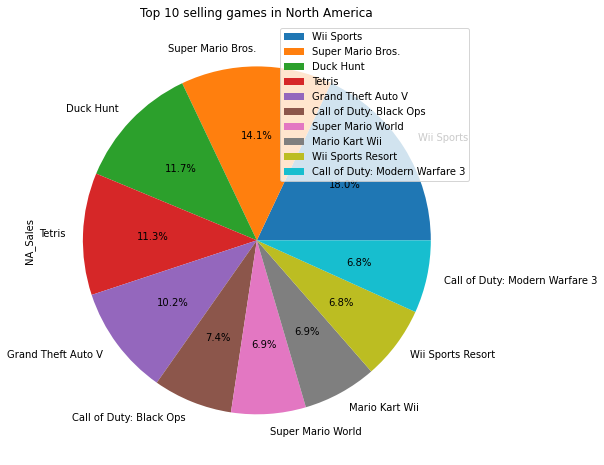

In [119]:
NA_top_10.plot.pie(y = 'NA_Sales',autopct='%1.1f%%', figsize=(10, 8));
plt.title("Top 10 selling games in North America");

It seems like Super mario bros was the best selling game in NA

#### Q5: Which are the top 10 Publishers?

In [127]:
top_10_pub = dataset.Publisher.value_counts().head(10)
top_10_pub

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

Electronic Arts Published most of the games.

Let us save and upload our work to Jovian before continuing.

In [128]:
import jovian

In [129]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhshah61/video-game-sales-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddhshah61/video-game-sales-eda


'https://jovian.ai/siddhshah61/video-game-sales-eda'

## Inferences and Conclusion

So we conclude our EDA by saying that Games are becoming more and more popular day by day. Many regions have already showed growth in the sales like NA, etc. Gaming will be a popular industry in the coming days.

In [132]:
import jovian

In [133]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhshah61/video-game-sales-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddhshah61/video-game-sales-eda


'https://jovian.ai/siddhshah61/video-game-sales-eda'

## References and Future Work

Refrences:

https://stackoverflow.com/questions/tagged/pandas

https://www.w3schools.com/python/pandas/default.asp

https://numpy.org/

https://matplotlib.org/


Future work is to use the map graph to compare the total sales.

In [6]:
import jovian

In [7]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhshah61/video-game-sales-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddhshah61/video-game-sales-eda


'https://jovian.ai/siddhshah61/video-game-sales-eda'